In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name, 
    },
).events()

In [3]:
p = sidm_processor.SidmProcessor(
    [
        "4mu",
        "2mu2e",
        "base",
        "baseNoLj",
    ],
    ["base"],
    #-0.4 means use the ljsource collection to cluster jets with radius 0.4, 
    # 0 means use the lepton jets directly from the ntuples
    # Any positive number is the radius of the jet, clustered with the photon, electron, muon, and dsa muon collections. 
    # So 0.4 means cluster ljs from the individual objects with a distance parameter of 0.4
    lj_reco_choices=["-0.4","0","0.2","0.4"]
)
out = p.process(events)

Not applying any cuts to the lepton jets for channel  baseNoLj
#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [4]:
out

{'SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6': {'cutflow': {'-0.4': {'4mu': <sidm.tools.cutflow.Cutflow at 0x7f28cff1dd90>,
    '2mu2e': <sidm.tools.cutflow.Cutflow at 0x7f24e8f229a0>,
    'base': <sidm.tools.cutflow.Cutflow at 0x7f24e203b490>,
    'baseNoLj': <sidm.tools.cutflow.Cutflow at 0x7f24e1ff36a0>},
   '0': {'4mu': <sidm.tools.cutflow.Cutflow at 0x7f24e203b3a0>,
    '2mu2e': <sidm.tools.cutflow.Cutflow at 0x7f24e1f63a60>,
    'base': <sidm.tools.cutflow.Cutflow at 0x7f24e1f73b50>,
    'baseNoLj': <sidm.tools.cutflow.Cutflow at 0x7f24e200e040>},
   '0.2': {'4mu': <sidm.tools.cutflow.Cutflow at 0x7f28cff1db20>,
    '2mu2e': <sidm.tools.cutflow.Cutflow at 0x7f24e1fa2760>,
    'base': <sidm.tools.cutflow.Cutflow at 0x7f24e2011e50>,
    'baseNoLj': <sidm.tools.cutflow.Cutflow at 0x7f24e200e580>},
   '0.4': {'4mu': <sidm.tools.cutflow.Cutflow at 0x7f28cff18f10>,
    '2mu2e': <sidm.tools.cutflow.Cutflow at 0x7f24e20195b0>,
    'base': <sidm.tools.cutflow.Cutflow at 0x7f24e2005cd0>,
 

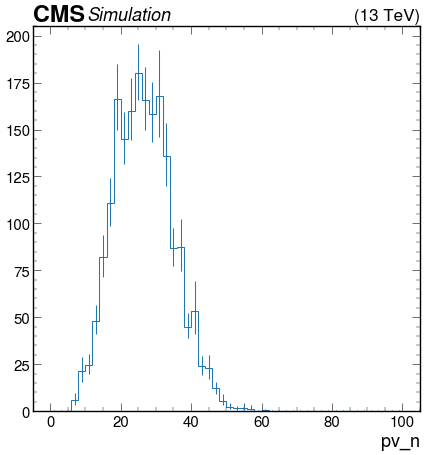

In [5]:
utilities.plot(out[sample_name]["hists"]["pv_n"]["0","base",:])

In [6]:
out[sample_name]["cutflow"]["0"]["2mu2e"].print_table()
print()
print("Unweighted, ntuple ljs (Option 0):")
out[sample_name]["cutflow"]["0"]["2mu2e"].print_table(unweighted=True)
print()
print("Unweighted, ljs from lj_source (Option -0.4):")
out[sample_name]["cutflow"]["-0.4"]["2mu2e"].print_table(unweighted=True)
print()
print("Unweighted, ljs from individual collections, dR < 0.4:")
out[sample_name]["cutflow"]["0.4"]["2mu2e"].print_table(unweighted=True)
print()
print("Unweighted, ljs from individual collections, dR < 0.2:")
out[sample_name]["cutflow"]["0.2"]["2mu2e"].print_table(unweighted=True)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             11518.1      11518.1
PV filter                11518.1      11518.1
Cosmic veto              11518.1      11518.1
>=2 LJs                   1914.4       1914.4
2mu2e                     1913.5       1913.5

Unweighted, ntuple ljs (Option 0):
cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             18359.0      18359.0
PV filter                18359.0      18359.0
Cosmic veto              18359.0      18359.0
>=2 LJs                   3041.0       3041.0
2mu2e                     3036.0       3036.0

Unweighted, ljs from lj_source (Option -0.4):
cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             18359.0      18359.0
PV filter                18359.0      18359.0
Cosmic veto              18359.0      18359.0
>=2 LJs                   3611.0       3611

In [7]:
out[sample_name]["cutflow"]["0"]["4mu"].print_table()
print()
print("Unweighted, ntuple ljs (Option 0):")
out[sample_name]["cutflow"]["0"]["4mu"].print_table(unweighted=True)
print()
print("Unweighted, ljs from lj_source (Option -0.4):")
out[sample_name]["cutflow"]["-0.4"]["4mu"].print_table(unweighted=True)
print()
print("Unweighted, ljs from individual collections, dR < 0.4:")
out[sample_name]["cutflow"]["0.4"]["4mu"].print_table(unweighted=True)
print()
print("Unweighted, ljs from individual collections, dR < 0.2:")
out[sample_name]["cutflow"]["0.2"]["4mu"].print_table(unweighted=True)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             11518.1      11518.1
PV filter                11518.1      11518.1
Cosmic veto              11518.1      11518.1
>=2 LJs                   1914.4       1914.4
4mu                          0.5          0.5

Unweighted, ntuple ljs (Option 0):
cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             18359.0      18359.0
PV filter                18359.0      18359.0
Cosmic veto              18359.0      18359.0
>=2 LJs                   3041.0       3041.0
4mu                          2.0          2.0

Unweighted, ljs from lj_source (Option -0.4):
cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             18359.0      18359.0
PV filter                18359.0      18359.0
Cosmic veto              18359.0      18359.0
>=2 LJs                   3611.0       3611

In [8]:
out[sample_name]["cutflow"]["0"]["2mu2e"].print_table(fraction=True)
print()
out[sample_name]["cutflow"]["0"]["2mu2e"].print_table(fraction=True, unweighted=True)

cut name        individual %    marginal %    cumulative %
------------  --------------  ------------  --------------
No selection           100.0         100.0           100.0
PV filter              100.0         100.0           100.0
Cosmic veto            100.0         100.0           100.0
>=2 LJs                 16.6          16.6            16.6
2mu2e                   16.6         100.0            16.6

cut name        individual %    marginal %    cumulative %
------------  --------------  ------------  --------------
No selection           100.0         100.0           100.0
PV filter              100.0         100.0           100.0
Cosmic veto            100.0         100.0           100.0
>=2 LJs                 16.6          16.6            16.6
2mu2e                   16.5          99.8            16.5


In [9]:
out[sample_name]["cutflow"]["0"]["4mu"].print_table()
out[sample_name]["cutflow"]["0"]["4mu"].print_table(unweighted=True)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             11518.1      11518.1
PV filter                11518.1      11518.1
Cosmic veto              11518.1      11518.1
>=2 LJs                   1914.4       1914.4
4mu                          0.5          0.5
cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             18359.0      18359.0
PV filter                18359.0      18359.0
Cosmic veto              18359.0      18359.0
>=2 LJs                   3041.0       3041.0
4mu                          2.0          2.0


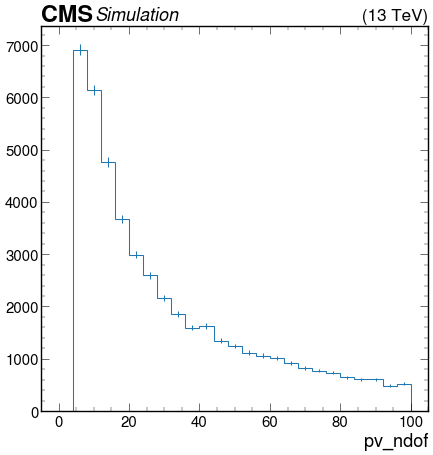

In [10]:
utilities.plot(out[sample_name]["hists"]["pv_ndof"]["0","2mu2e", :])

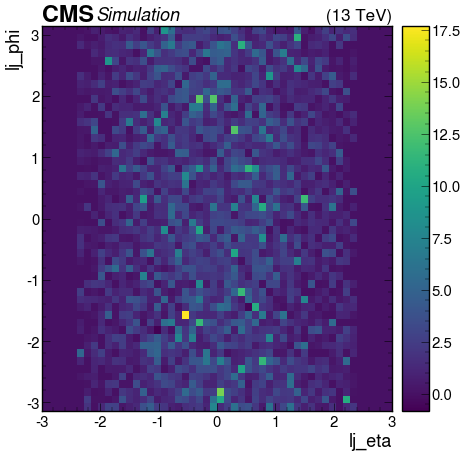

In [11]:
utilities.plot(out[sample_name]["hists"]["lj_eta_phi"]["0","2mu2e", :, :])

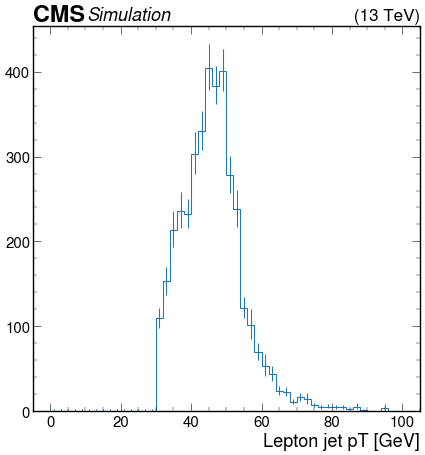

In [12]:
utilities.plot(out[sample_name]["hists"]["lj_pt"]["0","2mu2e", ::2j])

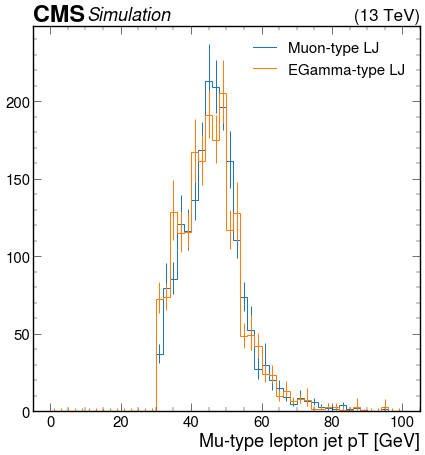

In [13]:
utilities.plot([
    out[sample_name]["hists"]["mu_lj_pt"]["0","2mu2e", ::2j],
    out[sample_name]["hists"]["egm_lj_pt"]["0","2mu2e", ::2j],
])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])

In [14]:
ljs = events.ljsource
#ljs = ak.mask(ljs, ak.num(ljs) >= 2)
ljs = ljs[ak.argsort(ljs.pt, ascending=False)]
ljs.pt[ak.num(ljs) >= 2, 1]
print(ak.num(ljs.pt))
print(ljs.pt)
print(events.weightProduct)

[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]
[[29.1, 13.4], [35.6], [11.7, 6.41], ... 18.9, 10.5], [72.5, 21.6, 16.9], [31.6]]
[0.0612, 0.373, 4.88, 0.979, 0.922, 0.0589, ... 0.14, 1.12, 0.542, 0.176, 4, 0.0781]


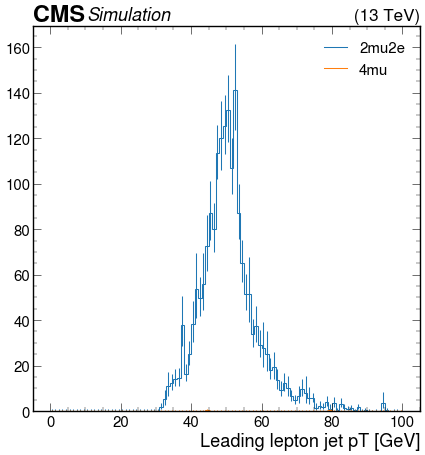

In [15]:
channels = ["2mu2e", "4mu"]
utilities.plot([out[sample_name]["hists"]["lj0_pt"]["0",ch, :] for ch in channels])
plt.legend(channels)

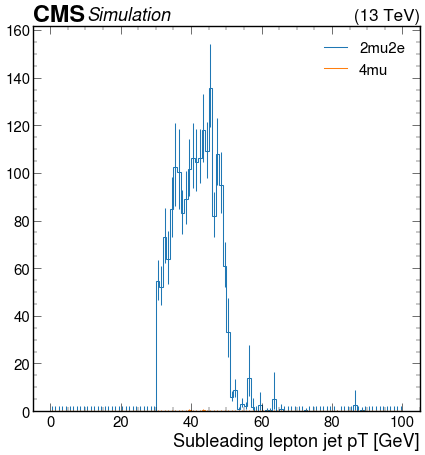

In [16]:
utilities.plot([out[sample_name]["hists"]["lj1_pt"]["0",ch, :] for ch in channels])
plt.legend(channels)

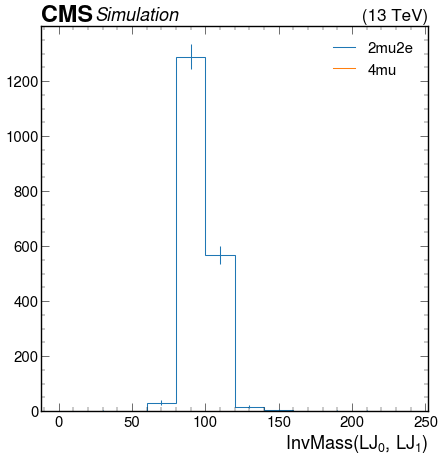

In [17]:
utilities.plot([out[sample_name]["hists"]["lj_lj_invmass"]["0",ch, :250j] for ch in channels])
plt.legend(channels)

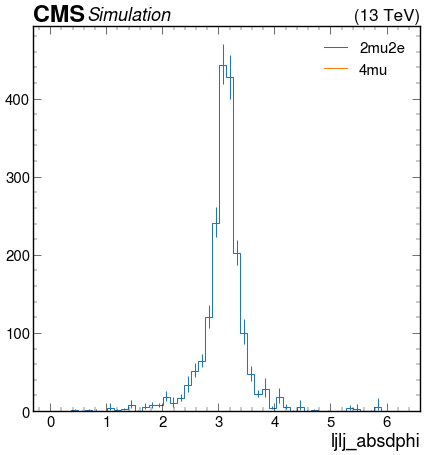

In [18]:
utilities.plot([out[sample_name]["hists"]["lj_lj_absdphi"]["0",ch, :] for ch in channels])
plt.legend(channels)

In [19]:
out[sample_name]["hists"]["lj_lj_absdphi"].axes[0]

StrCategory(['-0.4', '0', '0.2', '0.4'], name='lj_reco')

In [20]:
d = {
    "pv": events["pv"],
}
a = {
    "pv": d["pv"][:1800, :],
}
a["pv"]

<Array [[{rho: 0.0433, ... normChi2: 3.16}]] type='1800 * var * {"rho": float32[...'>